<a href="https://colab.research.google.com/github/ShubhamSS09/Shubham-SS_Rstudio/blob/main/Logistic_Regression_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [5]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [6]:
#CASENUM is not usefil so drop
claimants.drop(["CASENUM"], inplace= True, axis=1)

In [7]:
claimants.shape

(1340, 6)

1340 Rows and 6 Colms

In [44]:
#Removing NA valyues from data set
claimants = claimants.dropna().isnull()
claimants.shape

(1096, 6)

In [14]:
(#After removing the NA values rows reduced to 1096
#Now logistic regression require the different data frames
#So divide input and output variable to the same

In [22]:
X= claimants.iloc[:,1:]
Y= claimants.iloc[:,0]
#1 to last column we're saving in X andfirst column in Y

In [24]:
#Logistic regression and fitting the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [26]:
#Predict for X Dataset
y_pred=classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [28]:
y_pred_df =pd.DataFrame({'actual':Y,
                        'predicted_prob':y_pred})

In [29]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [39]:
#Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
CF_matrix = confusion_matrix(Y, y_pred)
CF_matrix

array([[381, 197],
       [123, 395]])

In [35]:
#Prob is adding digonal element / add all * 100
((381+395)/(381+197+123+395))*100

70.8029197080292

In [ ]:
#Prob is 70%

In [36]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [42]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

Text(0, 0.5, 'True Positive Rate')

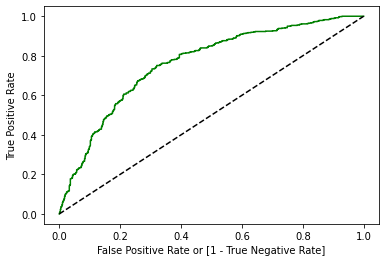

In [52]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color ='green', label= "logit model (area= %0.2f) " %auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [53]:
auc

0.7108589063606365